In [1]:
pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 6.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
import stanza 

In [3]:
stanza.download('en')

## Simple dependency parsing program

In [4]:
nlp=stanza.Pipeline('en')

In [5]:
sentence="The quick brown fox jumps over the lazy dog ."

In [6]:
doc=nlp(sentence)

In [7]:
print("word \tHead \tRelation")
for sent in doc.sentences:
    for word in sent.words:
        head=sent.words[word.head -1].text if word.head >0 else "ROOT"
        print(f"{word.text}\t{head}\t{word.deprel}")

word 	Head 	Relation
The	fox	det
quick	fox	amod
brown	fox	amod
fox	jumps	nsubj
jumps	ROOT	root
over	dog	case
the	dog	det
lazy	dog	amod
dog	jumps	obl
.	jumps	punct


## Advanced Dependency tree visualization using networkx + matplotlib

In [8]:
import networkx as nx

In [9]:
import matplotlib.pyplot as plt

In [10]:
G=nx.DiGraph()

In [11]:
for sent in doc.sentences:
    for word in sent.words:
        head_text = "ROOT" if word.head==0 else sent.words[word.head -1].text
        G.add_edge(head_text, word.text, label=word.deprel)

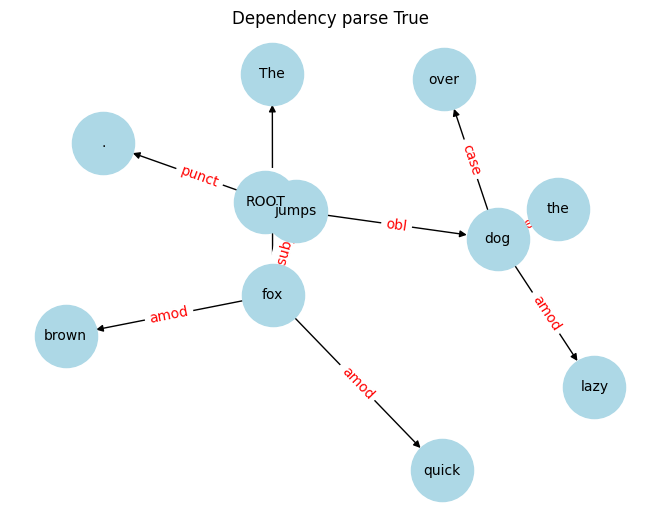

In [12]:
pos=nx.spring_layout(G)
labels=nx.get_edge_attributes(G,'label')
nx.draw(G,pos, with_labels=True, node_size=2000,node_color='lightblue',font_size=10)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels, font_color='red')
plt.title("Dependency parse True")
plt.show()